# Homework 3: Augmented Reality with Planar Homographies

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.

# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Preliminaries

## Q1.1 The Direct Linear Transform


### Q1.1.1 (3 points)

How many degrees of freedom does **h** have?

---

A 3x3 homography matrix H has 9 entries obviously. However, we fix one entry as a scalar multiple of H represents the same transformation. So 9 - 1 = 8

---

### Q1.1.2 (2 points)

How many point pairs are required to solve **h**?

---

Since we have 8 entries equaling 8 linear equations with 8 total unknowns, then we need 4 point pairs (each pair is 2 unknowns)

---

### Q1.1.3 (5 points)

Derive $\textbf{A}_i$

---

For each pair of corresponding points $(\bigl(x_i, y_i\bigr))$ in image 1 and $(\bigl(x'_i, y'_i\bigr))$ in image 2, the homography condition in homogeneous coordinates is:

$$
\begin{bmatrix}
x_i \\
y_i \\
1
\end{bmatrix}
\;\equiv\;
H
\begin{bmatrix}
x'_i \\
y'_i \\
1
\end{bmatrix},
\quad
\text{where }
H = 
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}.
$$

Or, multiplied out we have:

$$
\frac{h_{11} x'_i + h_{12} y'_i + h_{13}}{h_{31} x'_i + h_{32} y'_i + h_{33}} = x_i,
\quad
\frac{h_{21} x'_i + h_{22} y'_i + h_{23}}{h_{31} x'_i + h_{32} y'_i + h_{33}} = y_i.
$$

Rearranging these into linear equations in the components of \(H\), each correspondence contributes a \(2 \times 9\) block:

$$
A_i =
\begin{bmatrix}
-x'_i & -y'_i & -1 & 0 & 0 & 0 & x_i x'_i & x_i y'_i & x_i \\[6pt]
0 & 0 & 0 & -x'_i & -y'_i & -1 & y_i x'_i & y_i y'_i & y_i
\end{bmatrix}.
$$

Stacking \(A_i\) for all correspondences into a bigger matrix \(A\) yields:

$$
A\,h = 0,
\quad
\text{where}
\quad
h =
\begin{bmatrix}
h_{11} \\
h_{12} \\
h_{13} \\
h_{21} \\
h_{22} \\
h_{23} \\
h_{31} \\
h_{32} \\
h_{33}
\end{bmatrix}.
$$

---

### Q1.1.4 (5 points)

What will be the trivial solution for **h**? Is the matrix **A** full rank? Why/Why not? What impact will it have on the singular values (i.e. eigenvalues of $\textbf{A}^T\textbf{A}$)?

---

Trival solution for Ah = 0 is just that h = 0

A full rank?
    No, $(A)$ is not full rank because even with the minimum $(N = 4)$ (i.e., 8 equations total), one cannot achieve $(\text{rank}(A) = 9)$. For a valid homography solution, $(\text{rank}(A) = 8)$. So there is a one-dimensional null space that provides a valid nonzero solution for $(h)$.

Singular Values Impact?
- Because $(A)$ does not have full column rank, there is at least one singular value of $(A)$ that is zero. Therefore, in the matrix $(A^\top A)$, there is at least one zero eigenvalue corresponding to that one-dimensional null space. This zero singular value/eigenvalue leads to the nontrivial solution for the homography $(h)$.
---

## Q1.2 Homography Theory Questions

### Q1.2.1 (5 points)

Prove that there exists a homography **H** that satisfies $\textbf{x}_1 ≡ \textbf{Hx}_2$, given two cameras separated by a pure rotation.

---

Given two cameras with intrinsic matrices $(K_1)$ and $(K_2)$. Camera 1 observes a 3D point $(X)$ via:
$$
x_1 \;=\; K_1 [I \;\; 0] \, X \;\;\Longrightarrow\;\; x_1 \sim K_1 \, X,
$$
and Camera 2 observes the *same* 3D point \(X\) via a pure rotation \(R\) (about its center) and different intrinsics \(K_2\):
$$
x_2 \;=\; K_2 [R \;\; 0] \, X \;\;\Longrightarrow\;\; x_2 \sim K_2 \, R \, X.
$$

So to show that there is a $(3\times 3)$ matrix $(H)$ such that $(x_1 \equiv H x_2)$. We express $(X)$ in terms of $(x_2)$:
$$
x_2 \sim K_2 \, R \, X 
\;\;\Longrightarrow\;\;
X \sim R^{-1} K_2^{-1}\, x_2.
$$

Then substitute back into $(x_1 = K_1\,X)$:
$$
x_1 
\;\sim\;
K_1 
\Bigl( R^{-1} K_2^{-1}\, x_2 \Bigr)
\;=\;
\bigl(K_1\,R^{-1}\,K_2^{-1}\bigr)\,x_2.
$$

Then, the homography can be identified as:
$$
H 
\;=\;
K_1 \, R^{-1} \, K_2^{-1}.
$$


---

### Q1.2.2 (5 points):

Show that $\textbf{H}^2$ is the homography corresponding to a rotation of 2$\theta$.

---

Now suppose we have a single camera (with intrinsic matrix $(K)$ that rotates about its center by an angle $(\theta)$. The homography $(H)$ mapping the first orientation to the second is:
$$
H \;=\; K \, R(\theta) \, K^{-1},
$$
where \(R(\theta)\) is the $(3 \times 3)$ rotation matrix for the rotation $(\theta)$.

If we apply this rotation again (i.e., *two* successive rotations of $(\theta)$, the combined rotation is $(R(2\theta)$ = $R(\theta),R(\theta))$. Hence the homography for that combined rotation is:
$$
H^2 
\;=\;
\bigl(K \, R(\theta) \, K^{-1}\bigr)\,
\bigl(K \, R(\theta) \, K^{-1}\bigr)
\;=\;
K \, R(\theta)\, R(\theta) \, K^{-1}
\;=\;
K \, R(2\theta) \, K^{-1}.
$$

Thus $(H^2)$ corresponds exactly to a rotation by $(2\theta)$.

---

# Initialization

Run the following code to import the modules you'll need.

In [1]:
import os
import numpy as np
import cv2
import skimage.color
import pickle
from matplotlib import pyplot as plt
import scipy
from skimage.util import montage
import time

PATCHWIDTH = 9

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def write_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

def briefMatch(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2,
                                                'hamming',
                                                cross_check=True,
                                                max_ratio=ratio)
    return matches

def plotMatches(img1,img2,matches,locs1,locs2):

    fig, ax = plt.subplots(nrows=1, ncols=1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    skimage.feature.plot_matched_features(img1,img2,
                                          keypoints0=locs1,keypoints1=locs2,
                                          matches=matches,ax=ax,
                                          matches_color='r',only_matches=True)
    plt.show()
    return

def makeTestPattern(patchWidth, nbits):

    np.random.seed(0)
    compareX = patchWidth*patchWidth * np.random.random((nbits,1))
    compareX = np.floor(compareX).astype(int)
    np.random.seed(1)
    compareY = patchWidth*patchWidth * np.random.random((nbits,1))
    compareY = np.floor(compareY).astype(int)

    return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):

    halfWidth = width // 2
    col1 = idx1 % width - halfWidth
    row1 = idx1 // width - halfWidth
    col2 = idx2 % width - halfWidth
    row2 = idx2 // width - halfWidth
    return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0

def computeBrief(img, locs):

    patchWidth = 9
    nbits = 256
    compareX, compareY = makeTestPattern(patchWidth,nbits)
    m, n = img.shape

    halfWidth = patchWidth//2

    locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
    desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])

    return desc, locs

def corner_detection(img, sigma):

    # fast method
    result_img = skimage.feature.corner_fast(img, n=PATCHWIDTH, threshold=sigma)
    locs = skimage.feature.corner_peaks(result_img, min_distance=1)
    return locs

def loadVid(path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name

    cap = cv2.VideoCapture(path)

    # get fps, width, and height
    fps = cap.get(cv2.CAP_PROP_FPS)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Append frames to list
    frames = []

    # Check if camera opened successfully
    if cap.isOpened()== False:
        print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            #Store the resulting frame
            frames.append(frame)
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    frames = np.stack(frames)

    return frames, fps, width, height

# Download data

Download the required data and setup the results directory. If running on colab, DATA_PARENT_DIR must be <br> DATA_PARENT_DIR = '/content/' <br> <br> Otherwise, use the local directory of your choosing. Data will be downloaded to DATA_PARENT_DIR/hw3_data and a subdirectory DATA_PARENT_DIR/results will be created.

In [3]:
# Only change this if you are running locally
# Default on colab: DATA_PARENT_DIR = '/content/'

# Data will be downloaded to DATA_PARENT_DIR/hw3_data
# A subdirectory DATA_PARENT_DIR/results will be created

DATA_PARENT_DIR = 'content'

if not os.path.exists(DATA_PARENT_DIR):
  raise RuntimeError('DATA_PARENT_DIR does not exist: ', DATA_PARENT_DIR)

RES_DIR = os.path.join(DATA_PARENT_DIR, 'results')
if not os.path.exists(RES_DIR):
  os.mkdir(RES_DIR)
  print('made directory: ', RES_DIR)


#paths different files are saved to
# OPTIONAL:
# feel free to change if funning locally
ROT_MATCHES_PATH = os.path.join(RES_DIR, 'brief_rot_test.pkl')
ROT_INV_MATCHES_PATH = os.path.join(RES_DIR, 'ec_brief_rot_inv_test.pkl')
AR_VID_FRAMES_PATH = os.path.join(RES_DIR, 'q_3_1_frames.npy')
AR_VID_FRAMES_EC_PATH = os.path.join(RES_DIR, 'q_3_2_frames.npy')

HW3_SUBDIR = 'hw3_data'
DATA_DIR = os.path.join(DATA_PARENT_DIR, HW3_SUBDIR)
ZIP_PATH = DATA_DIR + '.zip'
if not os.path.exists(DATA_DIR):
  !wget 'https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip' -O $ZIP_PATH
  !unzip -qq $ZIP_PATH -d $DATA_PARENT_DIR

made directory:  content/results
--2025-02-27 22:46:56--  https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip
Resolving www.andrew.cmu.edu (www.andrew.cmu.edu)... 128.2.42.53
Connecting to www.andrew.cmu.edu (www.andrew.cmu.edu)|128.2.42.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36434294 (35M) [application/zip]
Saving to: ‘content/hw3_data.zip’

content/hw3_data.zi 100%[===================>]  34.75M  8.26MB/s    in 4.6s    

2025-02-27 22:47:01 (7.48 MB/s) - ‘content/hw3_data.zip’ saved [36434294/36434294]



# Q2 Computing Planar Homographies

## Q2.1 Feature Detection and Matching

### Q2.1.1 (5 points):

How is the FAST detector different from the Harris corner detector that you've seen in the lectures? Can you comment on its computation performance compared to the Harris corner detector?

---

FAST is far simpler and quicker than Harris computationally because Harris requires computing partial derivates, comparing eigenvalues, etc. FAST on the other hand with its threshold-based decision by examining a circle of pixels around a point just sees if those pixels are all brighter or darker than the center pixel by a threshold can be implemented with short-circuit logic of a decision tree.
---

### Q2.1.2 (5 points):

How is the BRIEF descriptor different from the filterbanks you've seen in the lectures? Could you use any one of the those filter banks as a descriptor?

---

The BRIEF descriptor is different from filterbanks because it uses pairwise intensity comparisons at pre-determined locations around a feature point yielding a binary string which is far far smaller and faster than the filterbank descriptors that produce high-dimensional responses.

Could we use a filter bank as a descriptor? 
- You could technically take the set of filter responses around a keypoint and treat that as a feature descriptor.  
- However, matching that higher dimensional descriptor is much more computationally difficult than matching the BRIEF descriptor with the Hamming distance

---

### Q2.1.3 (5 points):

Describe how the Hamming distance and Nearest Neighbor can be used to match interest points with BRIEF descriptors. What benefits does the Hamming distance have over a more conventional Euclidean distance measure in our setting?

---

Since the Hamming distance between two binary strings is the count of positions (bits) for which they differ, you can compute the BRIEF descriptor for a feature point in an image, and then, you can compute the BRIEF descriptors for all the key features of a 2nd image. Then, you can find the k number of nearest matching features determined by the smallest hamming distance of those features from the feature in the first image according to some threshold.

The benefit of comparing the hamming distance over the Euclidean distance is that the bitwise XOR operation followed by a population count is very fast on modern CPUs, can be stored very compactly, and robust to noise due to the changes caught by the changes in bits. 

---

### Q2.1.4 (10 points):

#### Implement the function matchPics()

In [4]:
def matchPics(I1, I2, ratio, sigma):
    """
    Match features across images

    Input
    -----
    I1, I2: Source images (RGB or Grayscale uint8)
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector

    Returns
    -------
    matches: List of indices of matched features across I1, I2 [p x 2]
    locs1, locs2: Pixel coordinates of matches [N x 2]
    """

    # ===== your code here! =====

    # TODO: Convert images to GrayScale
    # Input images can be either RGB or Grayscale uint8 (0 -> 255). Both need
    # to be supported.
    # Input images must be converted to normalized Grayscale (0.0 -> 1.0)
    # skimage.color.rgb2gray may be useful if the input is RGB.

    # 1) Convert images to grayscale, normalized to [0, 1]
    # Handle both RGB and Grayscale (uint8) inputs
    if I1.ndim == 3:  # likely RGB
        I1_gray = skimage.color.rgb2gray(I1)
    else:  # already single channel
        I1_gray = I1.astype(np.float32) / 255.0

    if I2.ndim == 3:  # likely RGB
        I2_gray = skimage.color.rgb2gray(I2)
    else:  # already single channel
        I2_gray = I2.astype(np.float32) / 255.0

    # TODO: Detect features in both images
    locs1 = corner_detection(I1_gray, sigma)
    locs2 = corner_detection(I2_gray, sigma)

    # TODO: Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, locs1)
    desc2, locs2 = computeBrief(I2_gray, locs2)

    # TODO: Match features using the descriptors
    matches = briefMatch(desc1, desc2, ratio)

    # ==== end of code ====

    return matches, locs1, locs2

#### Implement the function displayMatched

In [6]:
def displayMatched(I1, I2, ratio, sigma):
    """
    Displays matches between two images

    Input
    -----
    I1, I2: Source images
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    """

    print('Displaying matches for ratio: ', ratio, ' and sigma: ', sigma)

    # ===== your code here! =====
    # TODO: Use matchPics and plotMatches to visualize your results
    print('Displaying matches for ratio:', ratio, 'and sigma:', sigma)

    # Match features using matchPics
    matches, locs1, locs2 = matchPics(I1, I2, ratio, sigma)

    # Plot the matches using plotMatches
    plotMatches(I1, I2, matches, locs1, locs2)

    plt.show()

    # ==== end of code ====


#### Visualize the matches

Use the cell below to visualize the matches. The resulting figure should look similar (but not necessarily identical) to Figure 2.

Feel free to play around with the images and parameters. Please use the original images when submitting the report.

Figure 2 parameters:

*   image1_name = "cv_cover.jpg"
*   image1_name = "cv_desk.png"
*   ratio = 0.7
*   sigma = 0.15

Displaying matches for ratio:  0.7  and sigma:  0.15
Displaying matches for ratio: 0.7 and sigma: 0.15


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


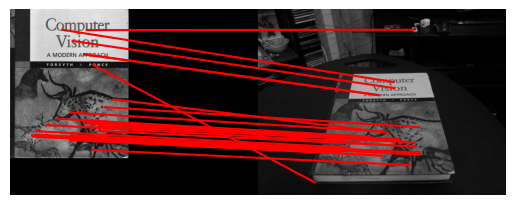

In [7]:
# Feel free to play around with these parameters
# BUT when submitting the report use the original images
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"
ratio = 0.7
sigma = 0.15

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

displayMatched(image1, image2, ratio, sigma)

### Q2.1.5 (10 points):

Experiment with different sigma and ratio values. Conduct a small ablation study, and include the figures displaying the matched features with various parameters in your write-up. Explain the effect of these two paremeters respectively.

---

Explain the effect of these two parameters: 

The ratio parameter clearly identifies the number of features while the sigma parameter details the threshold necessary to be considered a match. As you can see that there are far more lines as we increase the ratio parameter and some of those lines disappear as false matches are removed with the higher sigma threshold

---


--- Matching with ratio=0.6, sigma=0.05 ---
Displaying matches for ratio:  0.6  and sigma:  0.05
Displaying matches for ratio: 0.6 and sigma: 0.05


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


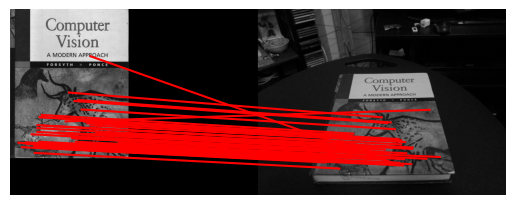


--- Matching with ratio=0.6, sigma=0.1 ---
Displaying matches for ratio:  0.6  and sigma:  0.1
Displaying matches for ratio: 0.6 and sigma: 0.1


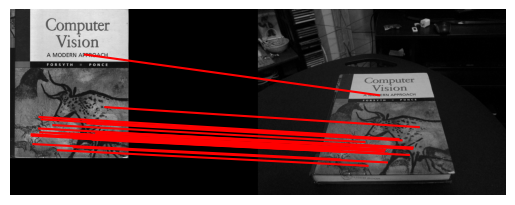


--- Matching with ratio=0.6, sigma=0.15 ---
Displaying matches for ratio:  0.6  and sigma:  0.15
Displaying matches for ratio: 0.6 and sigma: 0.15


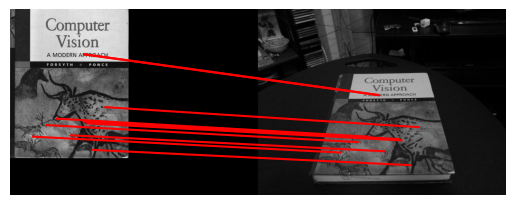


--- Matching with ratio=0.7, sigma=0.05 ---
Displaying matches for ratio:  0.7  and sigma:  0.05
Displaying matches for ratio: 0.7 and sigma: 0.05


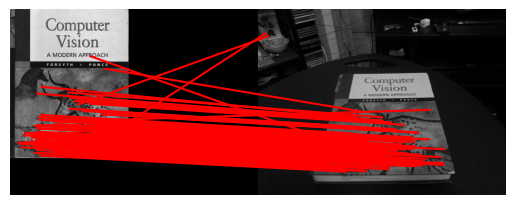


--- Matching with ratio=0.7, sigma=0.1 ---
Displaying matches for ratio:  0.7  and sigma:  0.1
Displaying matches for ratio: 0.7 and sigma: 0.1


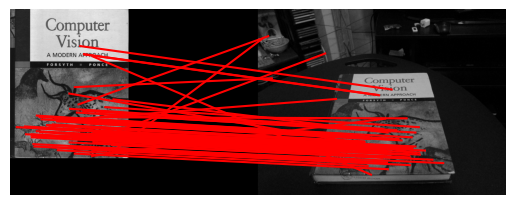


--- Matching with ratio=0.7, sigma=0.15 ---
Displaying matches for ratio:  0.7  and sigma:  0.15
Displaying matches for ratio: 0.7 and sigma: 0.15


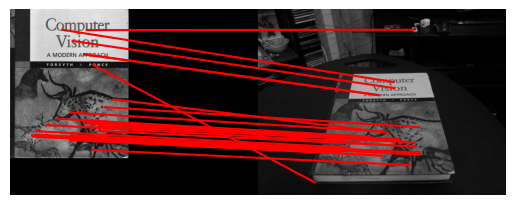


--- Matching with ratio=0.8, sigma=0.05 ---
Displaying matches for ratio:  0.8  and sigma:  0.05
Displaying matches for ratio: 0.8 and sigma: 0.05


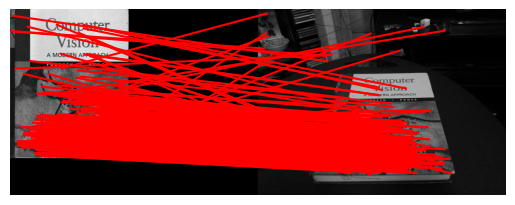


--- Matching with ratio=0.8, sigma=0.1 ---
Displaying matches for ratio:  0.8  and sigma:  0.1
Displaying matches for ratio: 0.8 and sigma: 0.1


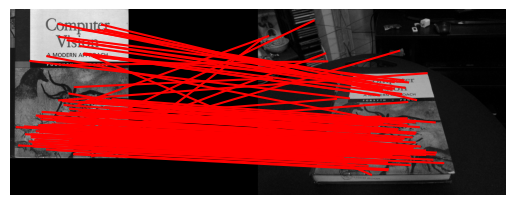


--- Matching with ratio=0.8, sigma=0.15 ---
Displaying matches for ratio:  0.8  and sigma:  0.15
Displaying matches for ratio: 0.8 and sigma: 0.15


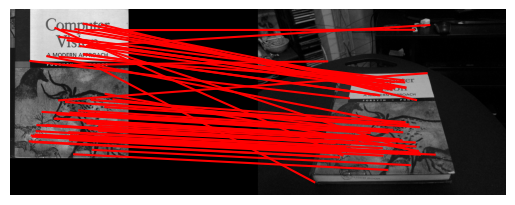

In [8]:
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# ===== your code here! =====
# Experiment with different sigma and ratio values.
# Use displayMatches to visualize.
# Include the matched feature figures in the write-up.
ratios = [0.6, 0.7, 0.8]
sigmas = [0.05, 0.1, 0.15]

for r in ratios:
    for s in sigmas:
        print(f"\n--- Matching with ratio={r}, sigma={s} ---")
        displayMatched(image1, image2, r, s)
# ==== end of code ====

### Q2.1.6 (10 points):

#### Implement the function briefRot

In [12]:
import scipy.ndimage


def briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Tests Brief with rotations.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    # Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # ===== your code here! =====
        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)
        #    - Typically, we set reshape=False so the image keeps the same size.
        #    - If the image is not square and you have issues, you might need to
        #      allow reshape=True, but then you must handle dimension changes.
        rotated_img = scipy.ndimage.rotate(image, i, reshape=False)

        # TODO: Match features in images
        matches, locs1, locs2 = matchPics(image, rotated_img, ratio, sigma)

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)
        if i in [0, 120, 240]:
            plt.figure(figsize=(8, 6))
            plotMatches(image, rotated_img, matches, locs1, locs2)
            plt.title(f"Matches at rotation = {i}°")
            plt.show()

        # TODO: Update match_degrees and match_counts (see descriptions above)
        match_degrees.append(i)
        match_counts.append(len(matches))
        # ==== end of code ====

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_MATCHES_PATH, matches_to_save)

def dispBriefRotHist(matches_path=ROT_MATCHES_PATH):
    # Check if pickle file exists
    if not os.path.exists(matches_path):
      raise RuntimeError('matches_path does not exist. did you call briefRot?')

    # Read from pickle file
    match_counts, match_degrees, deg_inc = read_pickle(matches_path)

    # Display histogram
    # Bins are centered and separated every 10 degrees
    plt.figure()
    bins = [x - deg_inc/2 for x in match_degrees]
    bins.append(bins[-1] + deg_inc)
    plt.hist(match_degrees, bins=bins, weights=match_counts, log=True)
    #plt.hist(match_degrees, bins=[10 * (x-0.5) for x in range(37)], weights=match_counts, log=True)
    plt.title("Histogram of BREIF matches")
    plt.ylabel("# of matches")
    plt.xlabel("Rotation (deg)")
    plt.tight_layout()

    output_path = os.path.join(RES_DIR, 'histogram.png')
    plt.savefig(output_path)

#### Visualize the matches under rotation

See debugging tips in handout.


0


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


<Figure size 800x600 with 0 Axes>

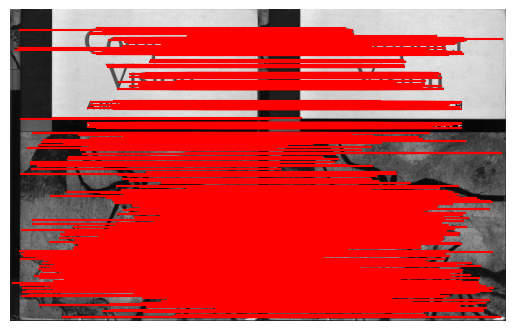

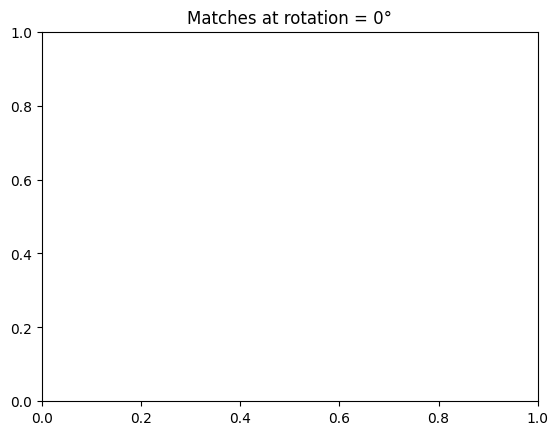

10
20
30
40
50
60
70
80
90
100
110
120


<Figure size 800x600 with 0 Axes>

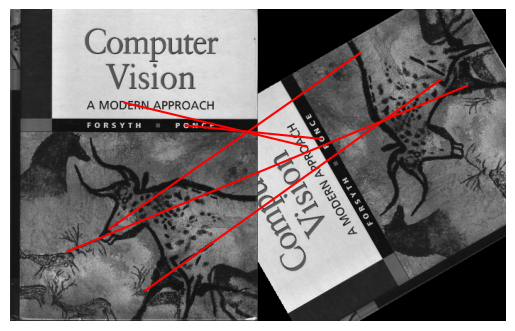

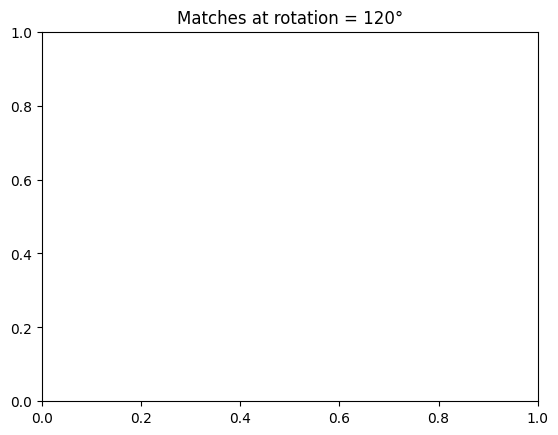

130
140
150
160
170
180
190
200
210
220
230
240


<Figure size 800x600 with 0 Axes>

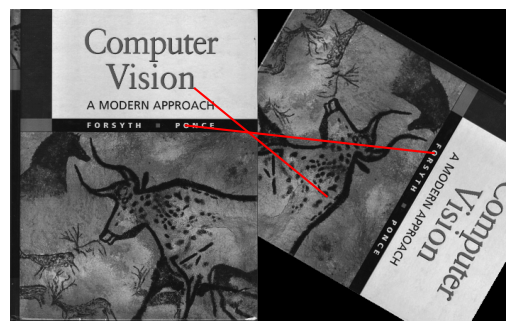

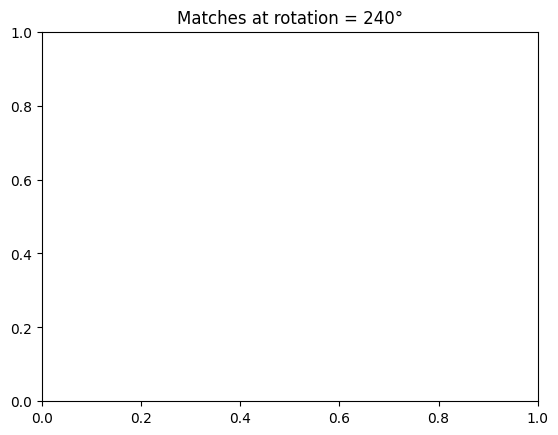

250
260
270
280
290
300
310
320
330
340
350


In [13]:
# defaults are:
# min_deg = 0
# max_deg = 360
# deg_inc = 10
# ratio = 0.7
# sigma = 0.15
# filename = 'cv_cover.jpg'

# Controls the rotation degrees
min_deg = 0
max_deg = 360
deg_inc = 10

# Brief feature descriptor and Fast feature detector paremeters
# (change these if you want to use different values)
ratio = 0.7
sigma = 0.15

# image to rotate and match
# (no need to change this but can if you want to experiment)
filename = 'cv_cover.jpg'

# Call briefRot
briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename)

#### Plot the histogram

See debugging tips in handout.

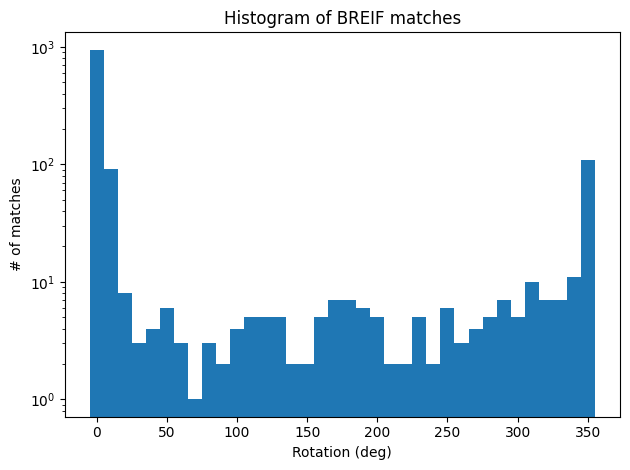

In [14]:
dispBriefRotHist()

---

Explain why you think the BRIEF descriptor behves this way: YOUR ANSWER HERE...

---

### Q2.1.7.1 (Extra Credit - 5 points):

Design a fix to make BRIEF more rotation invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.

In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Feel free to modify the inputs and the function body as necessary
# This is only an outline
def briefRotInvEc(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Rotation invariant Brief.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Brief matcher that is rotation invariant
        # Feel free to define additional helper functions as necessary

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_INV_MATCHES_PATH, matches_to_save)

# ==== end of code ====

#### Visualize your implemented function


In [ ]:
min_deg = 0
max_deg = 360
deg_inc = 10
filename = 'cv_cover.jpg'

# ===== your code here! =====
# TODO: Call briefRotInvEc and visualize

# ==== end of code ====


#### Plot Histogram

In [ ]:
dispBriefRotHist(matches_path=ROT_INV_MATCHES_PATH)

---

Compare the histograms with an without rotation invariance. Explain your rotation invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---

### Q2.1.7.2 (Extra Credit - 5 points):

Design a fix to make BRIEF more scale invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.


In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Modify the inputs and the function body as necessary
def briefScaleInvEc(ratio, sigma, filename):

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_scales = [] # stores the scaling factors
    match_counts = [] # stores the number of matches at each scaling factor

    for i in [1]:
        # Scale Image
        image_scale = cv2.resize(image,(int(image.shape[1]/(2**i)),
                                        int(image.shape[0]/(2**i))),
                                 interpolation = cv2.INTER_AREA)

        # TODO: Brief matcher that is scale invariant
        # Feel free to define additional helper functions as necessary

        # Compare to regular matchPics
        matches_orig, locs1_orig, locs2_orig = matchPics(image,
                                                         image_scale,
                                                         ratio, sigma)

        print('plotting non-scale invariant scale: ', 2**i)
        plotMatches(image, image_scale, matches_orig, locs1_orig,
                    locs2_orig)
        print('plotting scale-invariant: ', 2**i)
        plotMatches(image, image_scale, matches, locs1, locs2)

# ==== end of code ====

#### Visualize your implemented function

In [ ]:
# ===== your code here! =====
# TODO: Call briefScaleInvEc and visualize
# You may change any parameters and the function body as necessary

filename = 'cv_cover.jpg'

ratio = 0.7
sigma = 0.15

briefScaleInvEc(ratio, sigma, filename)
# ==== end of code ====

---

Explain your scale invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---


## Q2.2 Homography Computation

### Q2.2.1 (15 Points):

Implement the function computeH

In [39]:
def computeH(x1, x2):
    """
    Compute the homography between two sets of points

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    if x1.shape != x2.shape:
        raise RuntimeError('number of points do not match')

    # ===== your code here! =====
    # TODO: Compute the homography between two sets of points
    # Ensure x1, x2 are in inhomogeneous form (N x 2)
    # If they're already (N x 2), do nothing; if (N x 3), divide by last column.
    def to_inhomogeneous(pts):
        if pts.shape[1] == 3:  # homogeneous form
            pts = pts[:, :2] / pts[:, 2, np.newaxis]
        return pts

    x1 = to_inhomogeneous(x1)
    x2 = to_inhomogeneous(x2)

    # Number of correspondences
    N = x1.shape[0]

    # Build matrix A for DLT
    A = []
    for i in range(N):
        X1, Y1 = x1[i, 0], x1[i, 1]
        X2, Y2 = x2[i, 0], x2[i, 1]
        # Each correspondence contributes two rows
        A.append([ -X2, -Y2, -1,    0,    0,  0,  X1*X2,  X1*Y2, X1 ])
        A.append([   0,    0,  0, -X2, -Y2, -1,  Y1*X2,  Y1*Y2, Y1 ])

    A = np.array(A)

    # Solve for h using SVD
    # We want the singular vector (last column of V) corresponding to the smallest singular value
    _, _, Vt = np.linalg.svd(A)
    h = Vt[-1]  # last row of V^T -> last column of V

    # Reshape h to 3x3
    H2to1 = h.reshape(3, 3)

    # Normalize so bottom-right entry is 1 (or so the matrix has unit norm)
    # This is a common convention, not strictly mandatory
    if H2to1[-1, -1] != 0:
        H2to1 /= H2to1[-1, -1]
    # ==== end of code ====

    return H2to1

### Q2.2.2 (10 points):

Implement the function computeH_norm

In [40]:
def computeH_norm(x1, x2):
    """
    Compute the homography between two sets of points using normalization

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    # ===== your code here! =====
    # TODO: Compute the centroid of the points
    c1 = np.mean(x1, axis=0)
    c2 = np.mean(x2, axis=0)

    # TODO: Shift the origin of the points to the centroid
    x1_shifted = x1 - c1
    x2_shifted = x2 - c2

    # TODO: Normalize the points so that the largest distance from the
    # origin is equal to sqrt(2)
    dist1 = np.sqrt(np.sum(x1_shifted**2, axis=1))
    max_dist1 = np.max(dist1) if len(dist1) > 0 else 0
    s1 = np.sqrt(2) / max_dist1 if max_dist1 != 0 else 1.0

    # Compute scale for x2
    dist2 = np.sqrt(np.sum(x2_shifted**2, axis=1))
    max_dist2 = np.max(dist2) if len(dist2) > 0 else 0
    s2 = np.sqrt(2) / max_dist2 if max_dist2 != 0 else 1.0

    # TODO: Similarity transform 1
    '''  [ s1   0  -s1*c1x ]
         [  0  s1  -s1*c1y ]
         [  0   0     1    ] '''
    T1 = np.array([
        [s1, 0,   -s1 * c1[0]],
        [0,   s1, -s1 * c1[1]],
        [0,   0,   1]
    ])

    # TODO: Similarity transform 2
    T2 = np.array([
        [s2, 0,   -s2 * c2[0]],
        [0,   s2, -s2 * c2[1]],
        [0,   0,   1]
    ])

    # Convert x1, x2 into homogeneous coordinates for transformation
    x1_hom = np.hstack([x1, np.ones((x1.shape[0], 1))])
    x2_hom = np.hstack([x2, np.ones((x2.shape[0], 1))])

    # Apply similarity transforms
    x1_normalized = (T1 @ x1_hom.T).T
    x2_normalized = (T2 @ x2_hom.T).T

    # Now they are normalized. Extract inhomogeneous parts
    x1_norm_inh = x1_normalized[:, :2] / x1_normalized[:, [2]]
    x2_norm_inh = x2_normalized[:, :2] / x2_normalized[:, [2]]

    # TODO: Compute homography
    H_norm = computeH(x1_norm_inh, x2_norm_inh)

    # TODO: Denormalization
    # Denormalize: H2to1 = T1^{-1} * H_norm * T2
    T1_inv = np.linalg.inv(T1)
    H2to1 = T1_inv @ H_norm @ T2

    # ==== end of code ====

    return H2to1

### Q2.2.3 (25 points):

Implement RANSAC

In [57]:
def computeH_ransac(locs1, locs2, max_iters, inlier_tol):
    """
    Estimate the homography between two sets of points using ransac

    Input
    -----
    locs1, locs2: Lists of points
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    bestH2to1: 3x3 homography matrix that best transforms locs2 to locs1
    inliers: indices of RANSAC inliers

    """

    # ===== your code here! =====

    # TODO:
    # Compute the best fitting homography using RANSAC
    # given a list of matching points locs1 and loc2
    # Initialize
    bestH2to1 = None
    best_inliers = np.array([], dtype=int)
    num_points = locs1.shape[0]

    # Basic check
    if num_points < 4:
        raise ValueError("Need at least 4 correspondences to compute a homography")

    for _ in range(max_iters):
        # 1) Randomly sample 4 correspondences
        sample_idxs = np.random.choice(num_points, 4, replace=False)
        x1_sample = locs1[sample_idxs]
        x2_sample = locs2[sample_idxs]

        # 2) Compute the homography mapping x2 -> x1
        #    If computeH_norm is provided, use it for better stability:
        H = computeH_norm(x1_sample, x2_sample)
        
        # Or if only unnormalized version is available, call computeH:
        # H = computeH(x1_sample, x2_sample)

        # 3) Project all locs2 using this H
        locs2_hom = np.hstack((locs2, np.ones((num_points, 1))))  # Nx3
        projected = (H @ locs2_hom.T).T                          # Nx3
        # Convert back to inhomogeneous
        projected_inhom = projected[:, :2] / (projected[:, [2]] + 1e-12)

        # 4) Compute distances to locs1
        #    If distance < inlier_tol, the point is considered an inlier
        dists = np.linalg.norm(locs1 - projected_inhom, axis=1)
        inliers = np.where(dists < inlier_tol)[0]

        # 5) Keep track of the best H (largest number of inliers so far)
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            bestH2to1 = H

    # ==== end of code ====

    return bestH2to1, best_inliers

### Q2.2.4 (10 points):

#### Implement the function compositeH

In [56]:
def compositeH(H2to1, template, img):
    """
    Returns the composite image.

    Input
    -----
    H2to1: Homography from image to template
    template: template image to be warped
    img: background image

    Returns
    -------
    composite_img: Composite image

    """

    # ===== your code here! =====
    # TODO: Create a composite image after warping the template image on top
    # of the image using the homography
    # 1) Warp the template image to the same size as 'img'
    #    The output width/height should match 'img'
        # --- Ensure that both template and img are 3-channel (RGB/BGR) ---
    def to_3channel(arr):
        if arr.ndim == 2:
            return cv2.cvtColor(arr, cv2.COLOR_GRAY2RGB)
        elif arr.ndim == 3 and arr.shape[2] == 4:  # RGBA
            return arr[:, :, :3]
        return arr

    template = to_3channel(template)
    img = to_3channel(img)
    h_img, w_img = img.shape[:2]
    warped_template = cv2.warpPerspective(template, H2to1, (w_img, h_img))

    # 2) Create a mask of the warped template where it is non-zero
    #    So we can overlay it onto the background 'img'
    mask = np.sum(warped_template, axis=2) > 0  # shape (h_img, w_img)

    # 3) Make a copy of the background
    composite_img = img.copy()

    # 4) For all pixels where the warped template is non-zero, replace in the background
    composite_img[mask] = warped_template[mask]
    
    # ==== end of code ====

    return composite_img

#### Implement the function warpImage

In [58]:
def warpImage(ratio, sigma, max_iters, inlier_tol):
    """
    Warps hp_cover.jpg onto the book cover (similar to cv_cover only warped) in cv_desk.png.

    Input
    -----
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    """

    hp_cover = skimage.io.imread(os.path.join(DATA_DIR, 'hp_cover.jpg'))
    cv_cover = skimage.io.imread(os.path.join(DATA_DIR, 'cv_cover.jpg'))
    cv_desk = skimage.io.imread(os.path.join(DATA_DIR, 'cv_desk.png'))
    cv_desk = cv_desk[:, :, :3]

    # ===== your code here! =====
    if cv_cover.ndim == 2:
        cv_cover_color = cv2.cvtColor(cv_cover, cv2.COLOR_GRAY2RGB)
    elif cv_cover.shape[2] == 4:  # has alpha?
        cv_cover_color = cv_cover[:, :, :3]
    else:
        cv_cover_color = cv_cover.copy()

    # 2) For feature matching, we can pass grayscale images to matchPics.
    #    If cv_cover is already grayscale, fine. If it's color, we can convert.
    if cv_cover.ndim == 3:
        cv_cover_gray = cv2.cvtColor(cv_cover_color, cv2.COLOR_RGB2GRAY)
    else:
        cv_cover_gray = cv_cover  # it was already grayscale

    cv_desk_gray = cv2.cvtColor(cv_desk, cv2.COLOR_RGB2GRAY)
    # TODO: match features between cv_desk and cv_cover using matchPics
    matches, locs_desk, locs_cv = matchPics(cv_desk_gray, cv_cover_gray, ratio, sigma)

    # TODO: Scale matched pixels in cv_cover to size of hp_cover
    pts_desk = locs_desk[matches[:, 0]]  # shape (p, 2) in cv_desk
    pts_cv   = locs_cv[matches[:, 1]]    # shape (p, 2) in cv_cover

    # 3) Compute scale factors to map cv_cover -> hp_cover
    h_hp, w_hp = hp_cover.shape[:2]
    h_cv, w_cv = cv_cover.shape[:2]
    scale_x = w_hp / w_cv
    scale_y = h_hp / h_cv

    # 4) Scale pts2 to match hp_cover size
    pts_hp = pts_cv.astype(np.float32).copy()
    pts_hp[:, 0] *= scale_x
    pts_hp[:, 1] *= scale_y

    # 5) Compute homography by RANSAC (pts2_scaled -> pts1)
    bestH2to1, _ = computeH_ransac(pts_desk, pts_hp, max_iters, inlier_tol)
    
    # 6) Warp hp_cover onto cv_desk using the homography
    composite_img = compositeH(bestH2to1, hp_cover, cv_desk)

    # ==== end of code ====

    plt.imshow(composite_img)
    plt.show()

#### Visualize composite image

/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


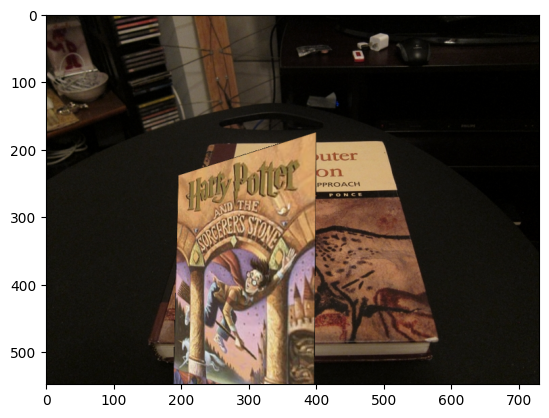

In [64]:
# defaults are:
# ratio = 0.7
# sigma = 0.15
# max_iters = 600
# inlier_tol = 1.0

# (no need to change this but can if you want to experiment)
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

warpImage(ratio, sigma, max_iters, inlier_tol)

### Q2.2.5 (10 points):

Conduct ablation study with various max_iters and inlier_tol values. Plot the result images and explain the effect of these two parameters respectively.


--- RANSAC with max_iters=500, inlier_tol=1.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


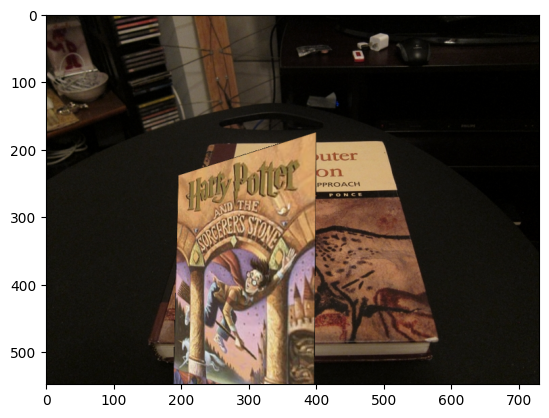


--- RANSAC with max_iters=500, inlier_tol=2.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


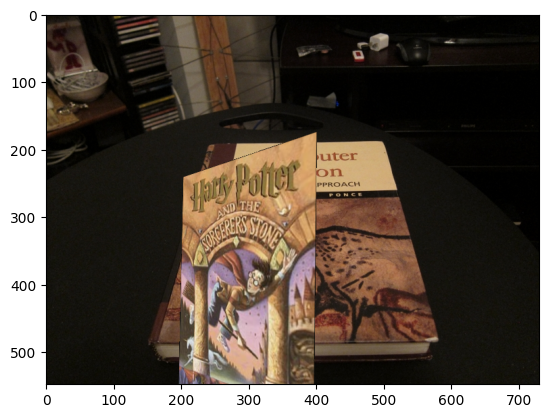


--- RANSAC with max_iters=500, inlier_tol=4.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


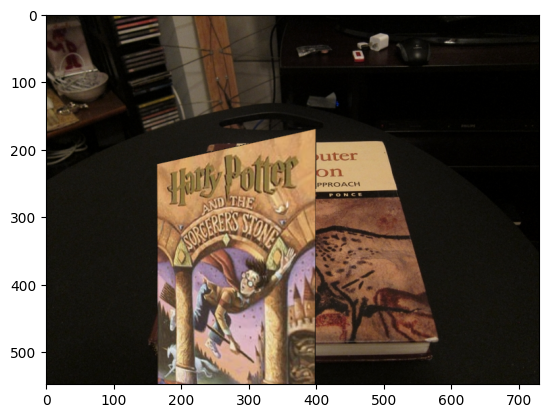


--- RANSAC with max_iters=1000, inlier_tol=1.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


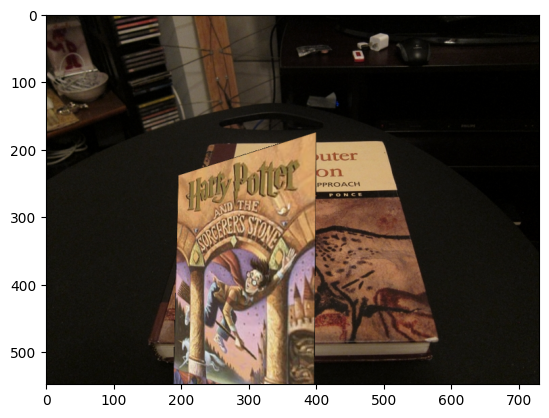


--- RANSAC with max_iters=1000, inlier_tol=2.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


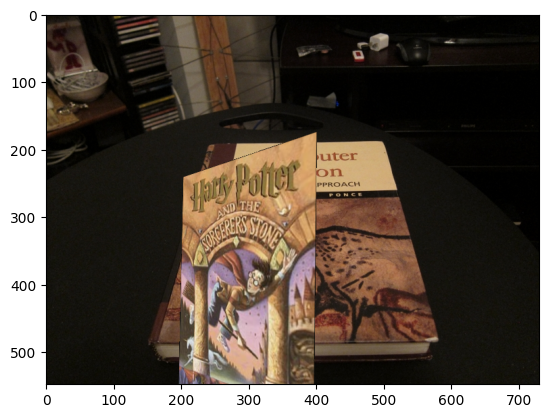


--- RANSAC with max_iters=1000, inlier_tol=4.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


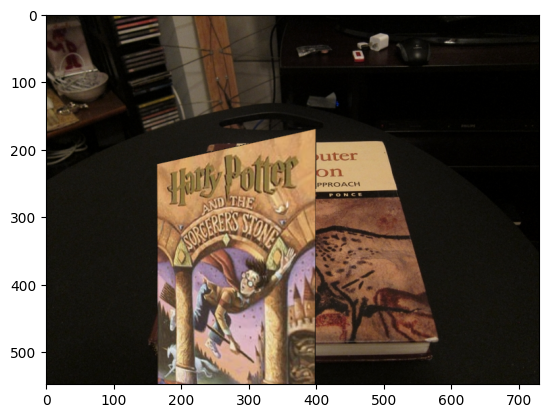


--- RANSAC with max_iters=2000, inlier_tol=1.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


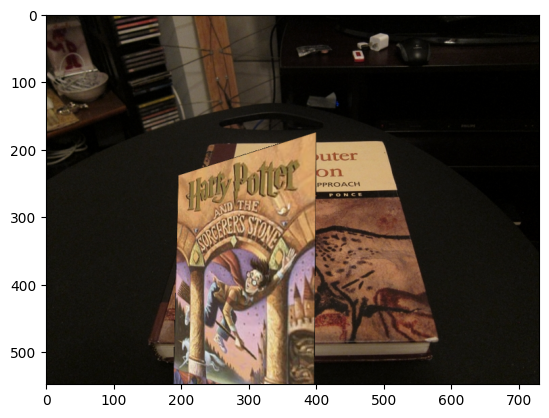


--- RANSAC with max_iters=2000, inlier_tol=2.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


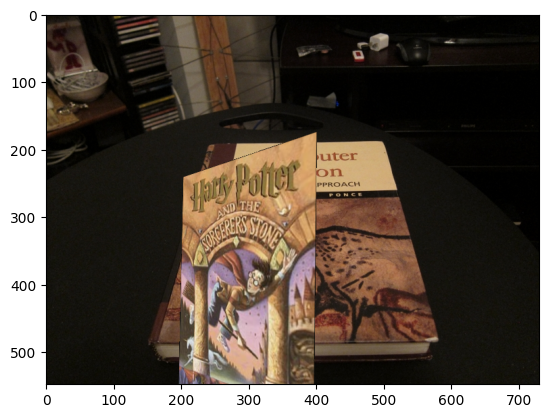


--- RANSAC with max_iters=2000, inlier_tol=4.0 ---


/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


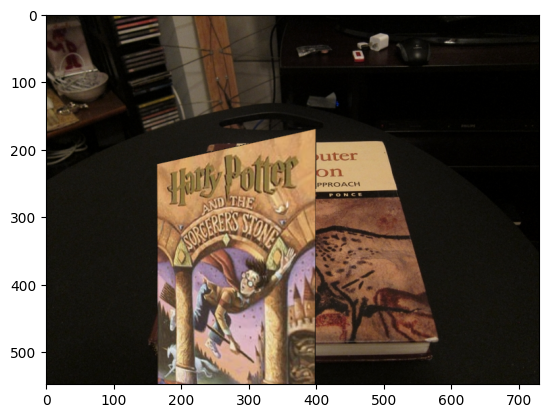

In [60]:
# ===== your code here! =====
# Experiment with different max_iters and inlier_tol values.
# Include the result images in the write-up.

max_iters_list = [500, 1000, 2000]
inlier_tol_list = [1.0, 2.0, 4.0]

for m in max_iters_list:
    for tol in inlier_tol_list:
        print(f"\n--- RANSAC with max_iters={m}, inlier_tol={tol} ---")
        warpImage(ratio=0.7, sigma=0.15, max_iters=m, inlier_tol=tol)
# ==== end of code ====

---

Explain the effect of max_iters and inlier_tol: 
It doesn't perfectly work above, but obviously the max iterations doesn't have near as much effect as the inlier tolerance which begins to turn the HP cover to be more in plane with the CV cover by allowing the warp to make greater and more matches matches

---

# Q3 Create a Simple Panorama

## Q3.1 Create a panorama (10 points):

#### Implement the function createPanorama

In [65]:
def createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol):
    """
    Create a panorama augmented reality application by computing a homography
    and stitching together a left and right image.

    Input
    -----
    left_im: left image
    right_im: right image
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    panorama_im: Stitched together panorama

    """

    # ===== your code here! =====
    # TODO: match features between images
    # This can be done using matchPics, cpselect, or any other function.
    matches, locs_left, locs_right = matchPics(left_im, right_im, ratio, sigma)
    pts_left = locs_left[matches[:, 0]]    # shape (p, 2)
    pts_right = locs_right[matches[:, 1]]  # shape (p, 2)

    # TODO: Get homography by RANSAC using computeH_ransac
    bestH2to1, _ = computeH_ransac(pts_left, pts_right, max_iters, inlier_tol)

    # TODO: Stich together the two images
    # Requires the use of cv2.warpPerspective
    h_left, w_left = left_im.shape[:2]
    h_right, w_right = right_im.shape[:2]
    pano_w = w_left + w_right
    pano_h = max(h_left, h_right)

    # 5) Warp the right image to the left image's coordinate system
    warped_right = cv2.warpPerspective(right_im, bestH2to1, (pano_w, pano_h))

    # 6) Combine: overlay the left image on top of the warped right image
    #    (Many advanced methods do alpha blending. We'll do a simple overlay here.)
    panorama_im = warped_right.copy()
    panorama_im[0:h_left, 0:w_left] = left_im

    # ==== end of code ====

    return panorama_im.astype(np.uint8)

#### Visualize Panorama

Make sure to use **your own images** and **include them as well as the result** in the report.

/tmp/ipykernel_132536/2274933143.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


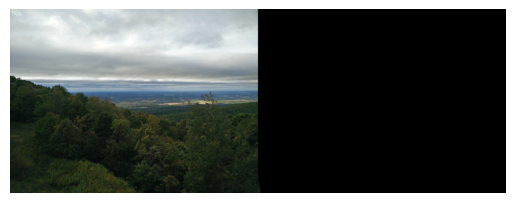

In [66]:
left_im_path = os.path.join(DATA_DIR, 'pano_left.jpg')
left_im = skimage.io.imread(left_im_path)
right_im_path = os.path.join(DATA_DIR, 'pano_right.jpg')
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)

plt.imshow(panorama_im)
plt.axis('off')
plt.show()